In [4]:
# .././test /home/mxi235/data/2d/uf.dat /home/mxi235/data/2d/vf.dat 3600 2400 /home/mxi235/data/traceview/tracepoints.bin
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import argparse
import re
import vtkmodules.all as vtk
import numpy as np

dat =np.fromfile('/Users/mingzexia/Documents/Github/tracecp/data/tracepoints.bin',dtype=np.float64).reshape(-1,1000,2)



# 轨迹数据，假设为一个200x50x2的numpy数组
num_cp = dat.shape[0]
num_timestep = dat.shape[1]


# 创建一个vtkPoints对象来存储轨迹点的坐标
points = vtk.vtkPoints()

# 添加轨迹点的坐标到vtkPoints对象
for i in range(num_cp):
    for j in range(num_timestep):
        x = dat[i, j, 0]
        y = dat[i, j, 1]
        z = 0.0  # Z坐标，这里设为0
        points.InsertNextPoint(x, y, z)

# 创建vtkCellArray对象来定义轨迹线
lines = vtk.vtkCellArray()

# 添加轨迹线的连接信息
for i in range(num_cp):
    polyline = vtk.vtkPolyLine()
    for j in range(num_timestep):
        polyline.GetPointIds().InsertNextId(i * num_timestep + j)
    lines.InsertNextCell(polyline)

# 创建vtkPolyData对象，并将点和线添加到其中
polydata = vtk.vtkPolyData()
polydata.SetPoints(points)
polydata.SetLines(lines)


# 将vtkPolyData保存为VTK文件
writer = vtk.vtkPolyDataWriter()
writer.SetFileName("/Users/mingzexia/Documents/Github/tracecp/data/dat.vtk")
writer.SetInputData(polydata)
writer.Write()


ValueError: cannot reshape array of size 90845614 into shape (1000,2)

In [123]:
# #dynamic length of data 
# # .././test ../data/uf.dat ../data/vf.dat 3600 2400 0.1 0.01 ../data/tracepoints.bin ../data/index.bin 
# original data
import numpy as np
import vtkmodules.all as vtk


dataset = "small_data"
#dataset = "data"

coordinates = np.fromfile(f'/Users/mingzexia/Documents/Github/tracecp/{dataset}/tracepoints.bin', dtype=np.float64).reshape(-1, 2)
index_array = np.fromfile(f'/Users/mingzexia/Documents/Github/tracecp/{dataset}/index.bin', dtype=np.int32)

# Create a vtkPoints object to store the coordinates
points = vtk.vtkPoints()

# Create a vtkCellArray object to define lines
lines = vtk.vtkCellArray()

current_index = 0
for length in index_array:
    # Skip single-point segments
    if length < 2:
        current_index += length
        continue

    # Add points to vtkPoints
    line = vtk.vtkPolyLine()
    for i in range(current_index, current_index + length):
        coord = coordinates[i]
        points.InsertNextPoint(coord[0], coord[1], 0.0)  # Z-coordinate is set to 0
        line.GetPointIds().InsertNextId(i)

    # Add the line to vtkCellArray
    lines.InsertNextCell(line)

    current_index += length

# Create vtkPolyData to store points and lines
polydata = vtk.vtkPolyData()
polydata.SetPoints(points)
polydata.SetLines(lines)

# Save vtkPolyData as a VTK file
writer = vtk.vtkPolyDataWriter()
writer.SetFileName(f"/Users/mingzexia/Documents/Github/tracecp/{dataset}/dat.vtk")
writer.SetInputData(polydata)
writer.Write()




1

In [97]:
#print first 100 coordinates
# import numpy as np
# import vtkmodules.all as vtk
print(coordinates[:100])

[[442.98245588 597.39896275]
 [442.99138371 597.40346762]
 [442.99311821 597.40200726]
 [442.99441339 597.40159364]
 [442.99560551 597.40157606]
 [442.99682345 597.40171616]
 [442.99812031 597.40192731]
 [442.9995218  597.40217881]
 [443.00104413 597.40246064]
 [443.00272853 597.40270488]
 [443.00458399 597.40291278]
 [443.00660754 597.40311549]
 [443.00880643 597.40332622]
 [443.01119269 597.4035511 ]
 [443.013781   597.4037935 ]
 [443.01658798 597.40405578]
 [443.0196319  597.40433996]
 [443.02293267 597.40464802]
 [443.02651195 597.40498204]
 [443.03039322 597.40534422]
 [443.03460194 597.40573695]
 [443.03916575 597.40616281]
 [443.0441146  597.4066246 ]
 [443.04948098 597.40712535]
 [443.05530011 597.40766835]
 [443.0616102  597.40825716]
 [443.06845266 597.40889565]
 [443.07587241 597.40958801]
 [443.08391816 597.41033878]
 [443.09264271 597.41115289]
 [443.10210334 597.41203568]
 [443.11236215 597.41299296]
 [443.12348649 597.414031  ]
 [443.13554937 597.41515662]
 [443.14862998

In [91]:
# decompressed data

import numpy as np
import vtkmodules.all as vtk

coordinates = np.fromfile('/Users/mingzexia/Documents/Github/tracecp/data/tracepoints.bin.out', dtype=np.float64).reshape(-1, 2)
index_array = np.fromfile('/Users/mingzexia/Documents/Github/tracecp/data/index.bin.out', dtype=np.int32)

# Create a vtkPoints object to store the coordinates
points = vtk.vtkPoints()

# Create a vtkCellArray object to define lines
lines = vtk.vtkCellArray()

current_index = 0
for length in index_array:
    # Skip single-point segments
    if length < 2:
        current_index += length
        continue

    # Add points to vtkPoints
    line = vtk.vtkPolyLine()
    for i in range(current_index, current_index + length):
        coord = coordinates[i]
        points.InsertNextPoint(coord[0], coord[1], 0.0)  # Z-coordinate is set to 0
        line.GetPointIds().InsertNextId(i)

    # Add the line to vtkCellArray
    lines.InsertNextCell(line)

    current_index += length

# Create vtkPolyData to store points and lines
polydata = vtk.vtkPolyData()
polydata.SetPoints(points)
polydata.SetLines(lines)

# Save vtkPolyData as a VTK file
writer = vtk.vtkPolyDataWriter()
writer.SetFileName("/Users/mingzexia/Documents/Github/tracecp/data/dat.out.vtk")
writer.SetInputData(polydata)
writer.Write()

1

In [ ]:
import numpy as np
import vtkmodules.all as vtk

coordinates = np.fromfile('/Users/mingzexia/Documents/Github/tracecp/data/tracepoints.bin', dtype=np.float64).reshape(-1, 2)
index_array = np.fromfile('/Users/mingzexia/Documents/Github/tracecp/data/index.bin', dtype=np.int32)

# Create a vtkPoints object to store the coordinates
points = vtk.vtkPoints()

# Create a vtkCellArray object to define polylines
polyline = vtk.vtkCellArray()

current_index = 0
for length in index_array:
    if length < 2:
        # Skip single-point segments
        current_index += length
        continue

    # Create a new polyline for each segment
    line = vtk.vtkPolyLine()

    # Add points to vtkPoints for the current segment
    for i in range(current_index, current_index + length):
        coord = coordinates[i]
        points.InsertNextPoint(coord[0], coord[1], 0.0)  # Z-coordinate is set to 0

    # Add point IDs to the current polyline
    for i in range(current_index, current_index + length):
        line.GetPointIds().InsertNextId(i)

    # Add the current polyline to the vtkCellArray
    polyline.InsertNextCell(line)

    current_index += length

# Create vtkPolyData to store points and polylines
polydata = vtk.vtkPolyData()
polydata.SetPoints(points)
polydata.SetLines(polyline)

# Save vtkPolyData as a VTK file
writer = vtk.vtkPolyDataWriter()
writer.SetFileName("/Users/mingzexia/Documents/Github/tracecp/data/dat.vtk")
writer.SetInputData(polydata)
writer.Write()


In [68]:
print(coordinates.shape)
print(index_array.sum())
print(len(index_array))
# print the max coordinates-x
print(coordinates[:,0].max())
# print the max coordinates-y
print(coordinates[:,1].max())
print(index_array.max())

(36387345, 2)
36387345
50360
3607.0587419105536
2398.0099968461564
1000


In [80]:
import numpy as np
import vtkmodules.all as vtk

coordinates = np.fromfile('/Users/mingzexia/Documents/Github/tracecp/data/tracepoints.bin.out', dtype=np.float64).reshape(-1, 2)
index_array = np.fromfile('/Users/mingzexia/Documents/Github/tracecp/data/index.bin.out', dtype=np.int32)

#print min and where is the min
print(coordinates.min())
print(coordinates.argmin())
print(index_array.min())    
print(index_array.argmin())
print(index_array[17776])
print(coordinates[sum(index_array[0:17776]):sum(index_array[0:17776])+20])

-8.595134353334519
37527970
12
17776
12
[[ 234.         1304.        ]
 [ 234.00740086 1303.99327488]
 [ 234.00563095 1303.99463089]
 [ 234.00421791 1303.99571349]
 [ 234.00308979 1303.9965778 ]
 [ 234.00218914 1303.99726783]
 [ 234.00147009 1303.99781873]
 [ 234.00089602 1303.99825855]
 [ 234.00043771 1303.99860969]
 [ 234.00007181 1303.99889002]
 [ 233.99977968 1303.99911383]
 [ 233.99963623 1303.99929496]
 [ 234.         1304.        ]
 [ 233.99259914 1304.00672512]
 [ 233.99492316 1304.00532337]
 [ 233.99651738 1304.00436179]
 [ 233.99761099 1304.00370217]
 [ 233.99836119 1304.00324968]
 [ 233.99887581 1304.00293928]
 [ 233.99922883 1304.00272635]]


In [99]:
import vtk
import numpy as np
from vtk.util.numpy_support import numpy_to_vtk
import sys

 
dataset = "small_data"
prefix = f"./{dataset}/position"
# outcome = sys.argv[2]
outcome = ["saddle","repelling","attracting","attracting_focus","repelling_focus"]

for out in outcome:

    polyData = vtk.vtkPolyData()
    points = vtk.vtkPoints()
    critical_points = np.fromfile("{}_{}.dat".format(prefix, out), dtype=np.float64).reshape([-1, 2])
    print(critical_points.shape)

    # points_np = np.array([[0.0, 0.0, 0.0], [1.0, 0.0, 0.0], [0.0, 1.0, 0.0]], dtype=np.float64)
    points_np = np.zeros([len(critical_points), 3], dtype=np.float64)
    points_np[:, :2] = critical_points
    points.SetData(numpy_to_vtk(points_np))
    polyData.SetPoints(points)
    # Colors = vtk.vtkUnsignedCharArray()
    # Colors.SetNumberOfComponents(3)
    # Colors.SetName("Colors")
    # Colors.InsertNextTuple3(255, 0, 0)
    # polyData.GetPointData().SetVectors(Colors)
    mapper = vtk.vtkPolyDataMapper()
    mapper.SetInputData(polyData)
    actor = vtk.vtkActor()
    actor.SetMapper(mapper)
    actor.GetProperty().SetColor(1,0,0)
    
    writer = vtk.vtkXMLPolyDataWriter()
    writer.SetFileName("{}_{}.vtp".format(prefix, out))
    writer.SetInputData(polyData)
    writer.Write()


(2848, 2)
(46, 2)
(51, 2)
(1276, 2)
(1477, 2)


In [58]:
import numpy as np
import vtkmodules.all as vtk
import pandas as pd
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
columns = ['start_sid','end_sid','dir', 'eig_vector_x', 'eig_vector_y']

data = np.fromfile("/Users/mingzexia/Documents/Github/tracecp/data/record.bin", dtype=np.float64).reshape([-1, 5])
data = pd.DataFrame(data,columns=columns)
print(data)

record_out = np.fromfile('/Users/mingzexia/Documents/Github/tracecp/data/record.bin.out', dtype=np.float64)
data_out = np.fromfile("/Users/mingzexia/Documents/Github/tracecp/data/record.bin.out", dtype=np.float64).reshape([-1, 5])
data_out = pd.DataFrame(data_out,columns=columns)
print(data_out)

# #compare the record and record_out





# data_out = pd.DataFrame(record_out)

# # set start_sid, dir, eig_vector_x, eig_vector_y as index



       start_sid     end_sid  dir  eig_vector_x  eig_vector_y
0     17233384.0  17233383.0  1.0      0.155493      0.987837
1     17233235.0  17226036.0  1.0      0.857406     -0.514641
2     17221276.0  16983729.0  1.0      0.723061     -0.690784
3     17219066.0  17211863.0  1.0     -0.101419      0.994844
4     17207987.0  17006425.0 -1.0      0.077165      0.997018
...          ...         ...  ...           ...           ...
6409  12901063.0  12706707.0 -1.0      0.512941      0.858424
6410  12901063.0  12706707.0 -1.0     -0.666977      0.745078
6411   1898371.0   1883977.0 -1.0      0.051569      0.998669
6412   1898371.0   1883977.0 -1.0     -0.682746      0.730656
6413   1861964.0   1876372.0 -1.0      0.044600      0.999005

[6414 rows x 5 columns]
       start_sid     end_sid  dir  eig_vector_x  eig_vector_y
0     17233384.0  17233383.0  1.0      0.155493      0.987837
1     17233235.0  17226036.0  1.0      0.857406     -0.514641
2     17219066.0  17211863.0  1.0     -0.1014

In [61]:
merged_df = pd.merge(data, data_out, on=['start_sid','end_sid', 'dir', 'eig_vector_x', 'eig_vector_y'], 
                     how='outer', indicator=True)

# 选出只在一个DataFrame中出现的行
different_rows = merged_df[merged_df['_merge'] != 'both']
# sorted by start_sid
different_rows = different_rows.sort_values(by=['start_sid'])
print(different_rows)


       start_sid     end_sid  dir  eig_vector_x  eig_vector_y      _merge
2850     77739.0    351180.0  1.0     -0.127891      0.991788   left_only
2851     77739.0    351180.0  1.0      0.177005      0.984210   left_only
6000     84874.0    228760.0  1.0      0.202629      0.979255   left_only
5999     84874.0    228760.0  1.0     -0.606394      0.795164   left_only
7884    109099.0    202698.0 -1.0      0.824592      0.565728  right_only
...          ...         ...  ...           ...           ...         ...
989   17207143.0  17106362.0 -1.0      0.280422      0.959877   left_only
6701  17207143.0  17099151.0 -1.0      0.280422      0.959877  right_only
4     17207987.0  17006425.0 -1.0      0.077165      0.997018   left_only
2     17221276.0  16983729.0  1.0      0.723061     -0.690784   left_only
6661  17228153.0  17228170.0  1.0      0.981937      0.189211  right_only

[4705 rows x 6 columns]


In [89]:
print(different_sid_end)

       start_sid  end_sid_df1  dir  eig_vector_x  eig_vector_y source_df1  \
6     17168739.0   16924871.0 -1.0      0.979172      0.203034        df1   
7     17168739.0   16924871.0 -1.0     -0.333111      0.942888        df1   
17    17125543.0   16924871.0 -1.0      0.152605      0.988287        df1   
18    17125543.0   16924871.0 -1.0      0.894601      0.446866        df1   
19    17132693.0   16924871.0 -1.0      0.057501      0.998345        df1   
42    17017710.0   16924871.0 -1.0     -0.298178      0.954510        df1   
43    17006623.0   16488353.0 -1.0      0.976332     -0.216279        df1   
44    17006623.0   16488353.0 -1.0      0.425254      0.905074        df1   
46    16983613.0   16839652.0 -1.0      0.128612      0.991695        df1   
49    16960074.0   16924871.0 -1.0     -0.559433      0.828876        df1   
55    16924570.0   16924871.0 -1.0      0.660979      0.750404        df1   
57    16924570.0   16924871.0 -1.0     -0.504349      0.863500        df1   

In [90]:
# end_sid changed
import pandas as pd

# 假设df1和df2是你的DataFrames

# 为每个DataFrame添加一个辅助列来标识来源
data['source'] = 'df1'
data_out['source'] = 'df2'

# 合并df1和df2，基于sid_start, dir, eig_x, eig_y列
merged_df = pd.merge(data, data_out, on=['start_sid','dir', 'eig_vector_x', 'eig_vector_y'], suffixes=('_df1', '_df2'))

# 找出那些sid_end不一致的行
different_sid_end = merged_df[merged_df['end_sid_df1'] != merged_df['end_sid_df2']]

# 显示结果
for index, row in different_sid_end.iterrows():
    print(f"start {row['start_sid']},{row['dir']},({row['eig_vector_x']},{row['eig_vector_y']}): end_sid changed from {row['end_sid_df1']} to {row['end_sid_df2']}")


start 17168739.0,-1.0,(0.9791717257520056,0.20303381858163264): end_sid changed from 16924871.0 to 16910127.0
start 17168739.0,-1.0,(-0.33311110260471855,0.9428875825470758): end_sid changed from 16924871.0 to 16910127.0
start 17125543.0,-1.0,(0.152605269700729,0.9882872212366037): end_sid changed from 16924871.0 to 16830800.0
start 17125543.0,-1.0,(0.8946008160205074,0.44686617680849616): end_sid changed from 16924871.0 to 16830800.0
start 17132693.0,-1.0,(0.057500790449869145,0.9983454607988361): end_sid changed from 16924871.0 to 16910127.0
start 17017710.0,-1.0,(-0.29817770770096214,0.9545103742915525): end_sid changed from 16924871.0 to 16830800.0
start 17006623.0,-1.0,(0.976331582020711,-0.21627908347534547): end_sid changed from 16488353.0 to 16409216.0
start 17006623.0,-1.0,(0.4252537038839473,0.9050741888557999): end_sid changed from 16488353.0 to 16409216.0
start 16983613.0,-1.0,(0.12861214949006392,0.9916949707463205): end_sid changed from 16839652.0 to 16782098.0
start 1696

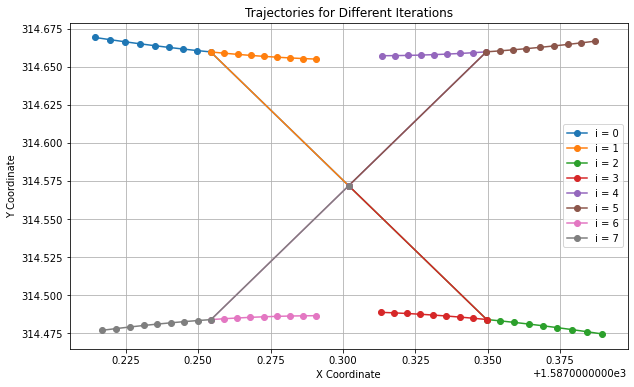

In [121]:
import numpy as np
# import polt
import matplotlib.pyplot as plt
# i/j (0,0)
result_return_00 = [
    (1587.301997, 314.571846),
    (1587.254340, 314.659760),
    (1587.249581, 314.660675),
    (1587.244764, 314.661667),
    (1587.239885, 314.662735),
    (1587.234938, 314.663881),
    (1587.229921, 314.665106),
    (1587.224828, 314.666412),
    (1587.219655, 314.667799),
    (1587.214398, 314.669270)
]

# i/j (0,1)
result_return_01 = [
    (1587.301997, 314.571846),
    (1587.254340, 314.659760),
    (1587.259044, 314.658919),
    (1587.263698, 314.658152),
    (1587.268306, 314.657457),
    (1587.272871, 314.656835),
    (1587.277398, 314.656285),
    (1587.281890, 314.655805),
    (1587.286351, 314.655395),
    (1587.290784, 314.655055)
]

# i/j (1,0)
result_return_10 = [
    (1587.301997, 314.571846),
    (1587.349653, 314.483932),
    (1587.354412, 314.483016),
    (1587.359229, 314.482025),
    (1587.364109, 314.480957),
    (1587.369055, 314.479810),
    (1587.374073, 314.478585),
    (1587.379165, 314.477280),
    (1587.384338, 314.475892),
    (1587.389595, 314.474422)
]

# i/j (1,1)
result_return_11 = [
    (1587.301997, 314.571846),
    (1587.349653, 314.483932),
    (1587.344949, 314.484773),
    (1587.340295, 314.485540),
    (1587.335687, 314.486234),
    (1587.331122, 314.486856),
    (1587.326595, 314.487407),
    (1587.322103, 314.487887),
    (1587.317643, 314.488297),
    (1587.313209, 314.488637)
]

# i/j (2,0)
result_return_20 = [
    (1587.301997, 314.571846),
    (1587.349548, 314.659817),
    (1587.344984, 314.659254),
    (1587.340441, 314.658761),
    (1587.335914, 314.658337),
    (1587.331400, 314.657983),
    (1587.326896, 314.657698),
    (1587.322397, 314.657483),
    (1587.317901, 314.657337),
    (1587.313403, 314.657261)
]

# i/j (2,1)
result_return_21 = [
    (1587.301997, 314.571846),
    (1587.349548, 314.659817),
    (1587.354136, 314.660449),
    (1587.358751, 314.661152),
    (1587.363398, 314.661926),
    (1587.368080, 314.662771),
    (1587.372801, 314.663687),
    (1587.377564, 314.664675),
    (1587.382373, 314.665736),
    (1587.387233, 314.666870)
]

# i/j (3,0)
result_return_30 = [
    (1587.301997, 314.571846),
    (1587.254445, 314.483875),
    (1587.259009, 314.484438),
    (1587.263552, 314.484931),
    (1587.268079, 314.485354),
    (1587.272593, 314.485709),
    (1587.277097, 314.485993),
    (1587.281596, 314.486208),
    (1587.286092, 314.486354),
    (1587.290591, 314.486431)
]

# i/j (3,1)
result_return_31 = [
    (1587.301997, 314.571846),
    (1587.254445, 314.483875),
    (1587.249857, 314.483242),
    (1587.245242, 314.482539),
    (1587.240595, 314.481765),
    (1587.235913, 314.480921),
    (1587.231192, 314.480004),
    (1587.226429, 314.479016),
    (1587.221620, 314.477955),
    (1587.216761, 314.476821)
]

# 绘图
plt.figure(figsize=(10, 6))
for idx, data in enumerate([result_return_00, result_return_01, result_return_10, result_return_11, result_return_20, result_return_21, result_return_30, result_return_31]):
    x, y = zip(*data)
    plt.plot(x, y, marker='o', label=f'i = {idx}')

plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Trajectories for Different Iterations')
plt.legend()
plt.grid(True)
plt.show()

In [117]:
(1587.301997 -1587.254340)/0.1

0.47657000000072003